<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>COG functional categories</a></span></li><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-5.4.1.1"><span class="toc-item-num">5.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Run `LLMGAG` (metagenome assembly of genes) pipeline on animal gut microbiome metagenome study
* study = PRJEB29346
  * host = cod

# Var

In [1]:
studyID = 'PRJEB29346'
base_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/',
                     studyID)
tmp_out_dir = file.path('/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/',
                        studyID)

work_dir = file.path(base_dir, 'LLMGAG')

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/'
threads = 24

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [3]:
make_dir(base_dir)
make_dir(tmp_out_dir)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB29346 
Directory already exists: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB29346 
Created directory: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB29346/LLMGAG 


# LLMGAG

## Setup

In [5]:
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB29346/LLMGQC/final/samples.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB29346/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamond_db: /ebio/abt3_projects/databases_no-backup/humann2/uniref50/uniref50_annot

### Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/methanogen_host_evo/bin/llmgag
$ screen -L -S llmgag-PRJEB29346 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB29346/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB29346/LLMGAG/SGE_log 24
```

In [6]:
pipelineInfo(pipeline_dir)

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/dask.yaml <==
channels: !!python/tuple
- co

# Summary

## Number of genes assembled & clustered

In [8]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 14607288 


In [9]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 6174459 


In [10]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 858191 


## Taxonomy

In [11]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 19380 rows [159, 996, 1012, 1031, 1249, 1564, 1645, 1939, 2539, 3049, 3189, 3447, 3597, 4135, 5108, 5515, 5760, 5852, 6005, 6184, ...].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 2342629 rows [4, 9, 15, 17, 18, 21, 22, 23, 24, 27, 29, 30, 40, 41, 47, 48, 49, 50, 62, 67, ...].”

[1] 6174459      11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
0efb01ba7601473bbd246b37131f33ae,7955,species,Danio rerio,Metazoa,Chordata,Actinopteri,Cypriniformes,Cyprinidae,Danio,Danio rerio
5d27778b10e942ca86d4d48cf5001102,69293,species,Gasterosteus aculeatus,Metazoa,Chordata,Actinopteri,Perciformes,Gasterosteidae,Gasterosteus,Gasterosteus aculeatus
e6426975dc8244bfb1b78d6961aa3ddd,28229,species,Colwellia psychrerythraea,unknown,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Colwellia,Colwellia psychrerythraea


In [12]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 6174459


In [13]:
# which ranks found?
tax$rank %>% table %>% print

.
           class           cohort           family            forma 
           14614             1988             4575                3 
           genus       infraclass       infraorder          kingdom 
           14779              180                8               76 
         no rank            order        parvorder           phylum 
         3041954             5403               17             5414 
         species    species group species subgroup         subclass 
         2994790              120                4              250 
       subfamily         subgenus       subkingdom         suborder 
             569               17                1             1203 
       subphylum       subspecies       superclass      superfamily 
              15            82782              116               12 
    superkingdom       superorder            tribe         varietas 
            5261              224                8               76 


In [14]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [15]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 192   3


Domain,Phylum,n
Fungi,Ascomycota,24143
Fungi,Basidiomycota,631
Fungi,Blastocladiomycota,8


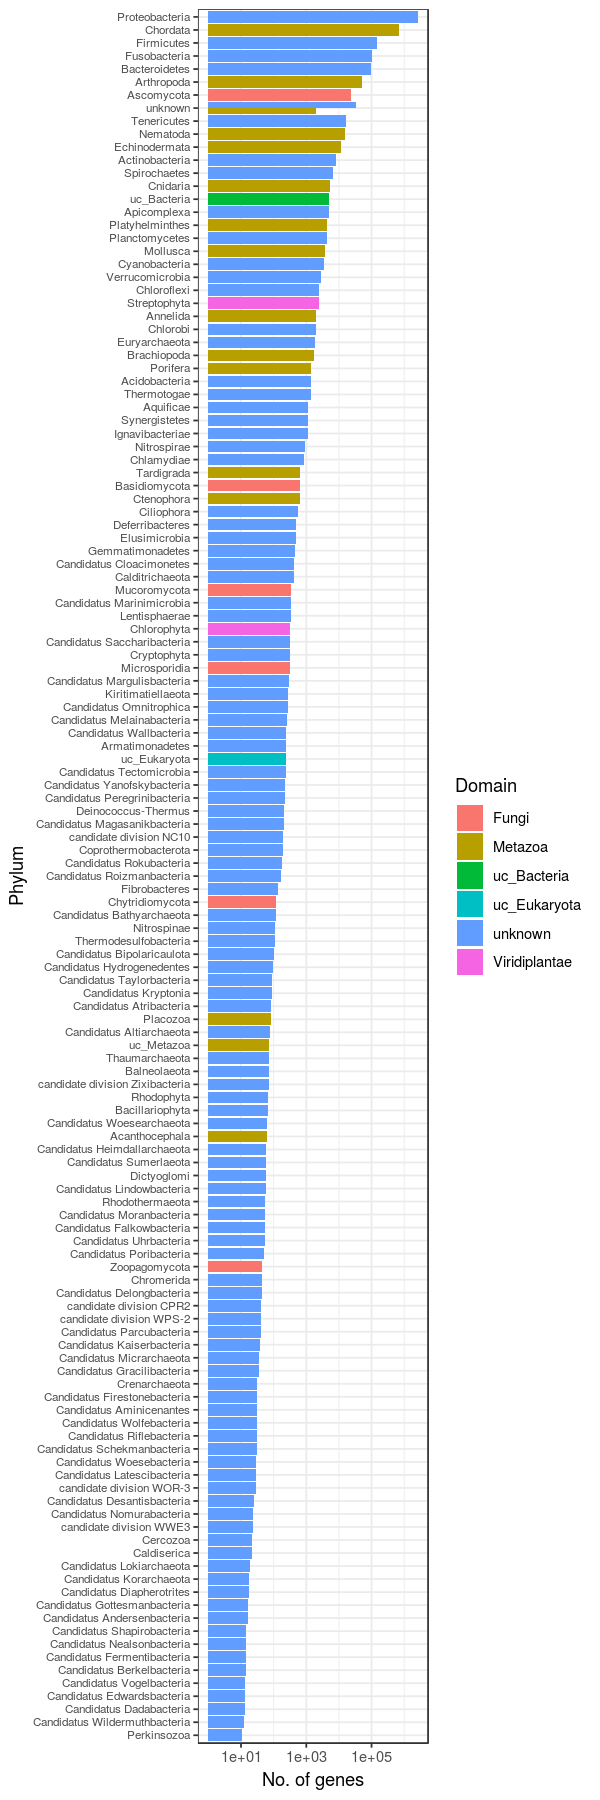

In [16]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,15)
plot(p)

In [17]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
unknown,Proteobacteria,2578735
Metazoa,Chordata,671654
unknown,Firmicutes,145818
unknown,Fusobacteria,101945
unknown,Bacteroidetes,94965
Metazoa,Arthropoda,50700
unknown,unknown,33661
Fungi,Ascomycota,24143
unknown,Tenericutes,16641
Metazoa,Nematoda,15037


In [18]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 395   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Dothideomycetes,35
Fungi,Ascomycota,Eurotiomycetes,88
Fungi,Ascomycota,Leotiomycetes,2066


In [19]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
unknown,Proteobacteria,Gammaproteobacteria,2454851
Metazoa,Chordata,Actinopteri,625212
unknown,Firmicutes,Clostridia,105135
unknown,Fusobacteria,Fusobacteriia,101945
unknown,Bacteroidetes,Bacteroidia,57908
unknown,Proteobacteria,Betaproteobacteria,42882
unknown,Proteobacteria,Alphaproteobacteria,39369
unknown,unknown,unknown,32935
unknown,Firmicutes,Bacilli,30134
Metazoa,Arthropoda,Arachnida,27174


## Annotations

In [20]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') %>%
  dplyr::select(-V6)
emap_annot %>% dfhead

[1] 3704857      21


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22


In [21]:
# adding taxonomy info
intersect(emap_annot$V1, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('V1'='seqID'))

emap_annot %>% dfhead

[1] 3704857
[1] 3704857      31


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species


In [22]:
n_annot_seqs = emap_annot$V1 %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 3704857 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [23]:
# summarizing by functional group
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 3704857 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 1025139       2


V1,COG_func_cat
3bbb556cb56f4eaf80ff73fdb1d986be,"R02017,R02018,R02019,R02024"
d031460ae6084db385c8cc8914d74bd8,R11372
f9604a7dd5b241e0b37b68c2c1f7147a,"R00212,R06987"


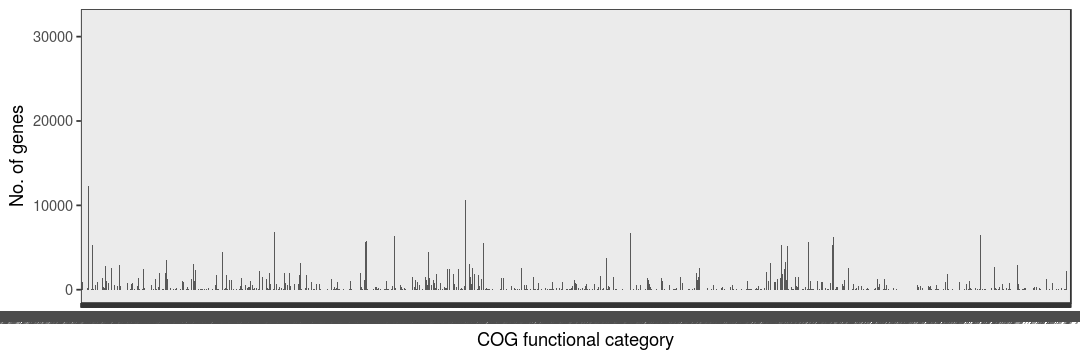

In [24]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

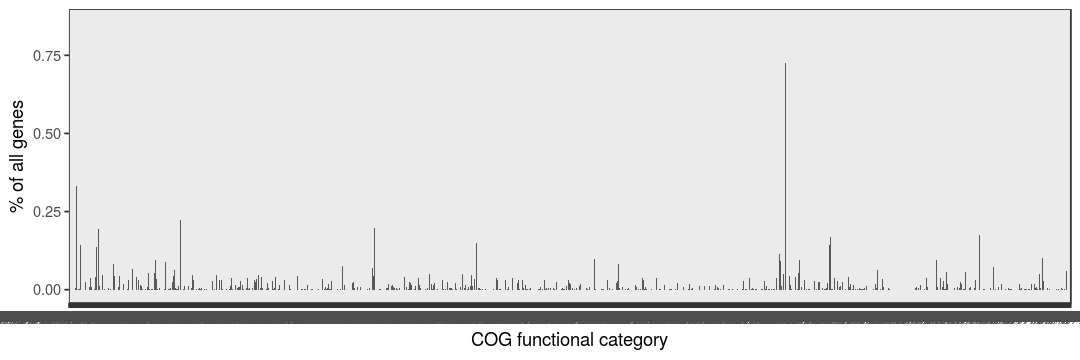

In [25]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

### Grouped by taxonomy

In [26]:
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    left_join(tax, c('V1'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 3704857 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 1025139      12


V1,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
3bbb556cb56f4eaf80ff73fdb1d986be,"R02017,R02018,R02019,R02024",1432552,no rank,Klebsiella pneumoniae IS43,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella pneumoniae
d031460ae6084db385c8cc8914d74bd8,R11372,1134687,species,Klebsiella michiganensis,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella michiganensis
f9604a7dd5b241e0b37b68c2c1f7147a,"R00212,R06987",903510,no rank,Vibrio furnissii NCTC 11218,unknown,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio furnissii


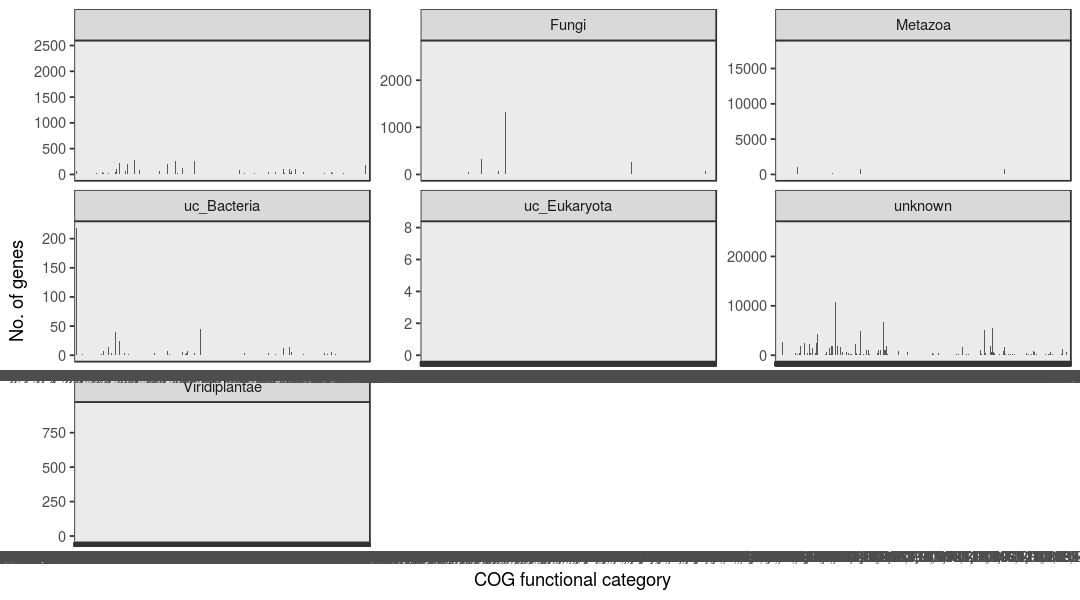

In [27]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

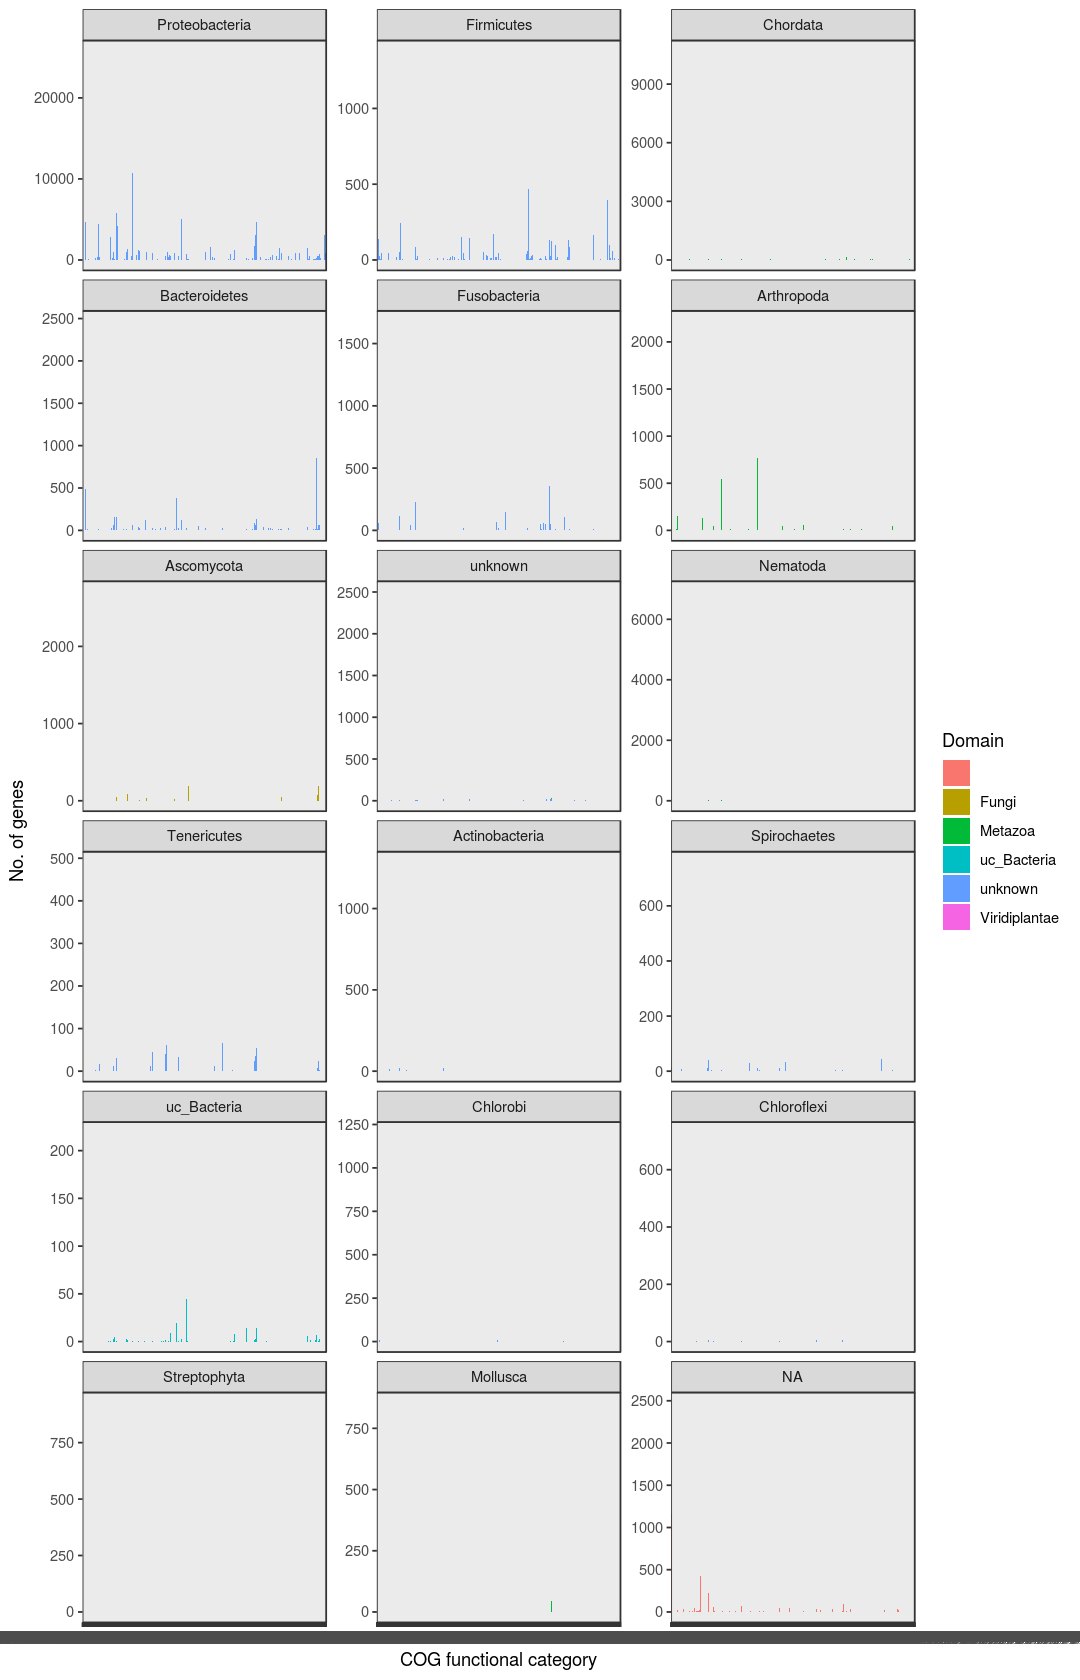

In [28]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,14)
plot(p)

## humann2 db genes

In [29]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 54399 rows [29, 32, 42, 63, 102, 115, 153, 201, 252, 272, 284, 285, 304, 310, 311, 319, 369, 378, 379, 408, ...].”

[1] 858191      6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
d031460ae6084db385c8cc8914d74bd8,UniRef50_W1C2I4,86,Klebsiella,Klebsiella_michiganensis,1134687
fea1d2ca8eb44c10b09af7b5fd798ed7,UniRef50_G8GMP8,86,Escherichia,Escherichia_coli,1268995
29c96bb5d90e49fca10cbc7655a6ca3a,UniRef50_W1G2Y0,190,Rodentibacter,Rodentibacter_myodis,1907939


In [30]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 858191
[1] 858191     16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
d031460ae6084db385c8cc8914d74bd8,UniRef50_W1C2I4,86,Klebsiella,Klebsiella_michiganensis,1134687,1134687,species,Klebsiella michiganensis,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella michiganensis
fea1d2ca8eb44c10b09af7b5fd798ed7,UniRef50_G8GMP8,86,Escherichia,Escherichia_coli,1268995,1268995,no rank,Escherichia coli 908525,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli
29c96bb5d90e49fca10cbc7655a6ca3a,UniRef50_W1G2Y0,190,Rodentibacter,Rodentibacter_myodis,1907939,1907939,species,Rodentibacter myodis,unknown,Proteobacteria,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Rodentibacter,Rodentibacter myodis


### Summary

In [31]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 74349

In [32]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_G7P3W5,4641
UniRef50_G7PZX1,4096
UniRef50_G7P766,2688
UniRef50_L7MAZ2,2471
UniRef50_Q6LJS0,1750
UniRef50_A9KVH4,1260
UniRef50_A8H7S7,1108
UniRef50_M4AZB4,1070
UniRef50_W5NNH5,1035
UniRef50_L7MCZ7,914


In [33]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 803792

#### By taxonomy

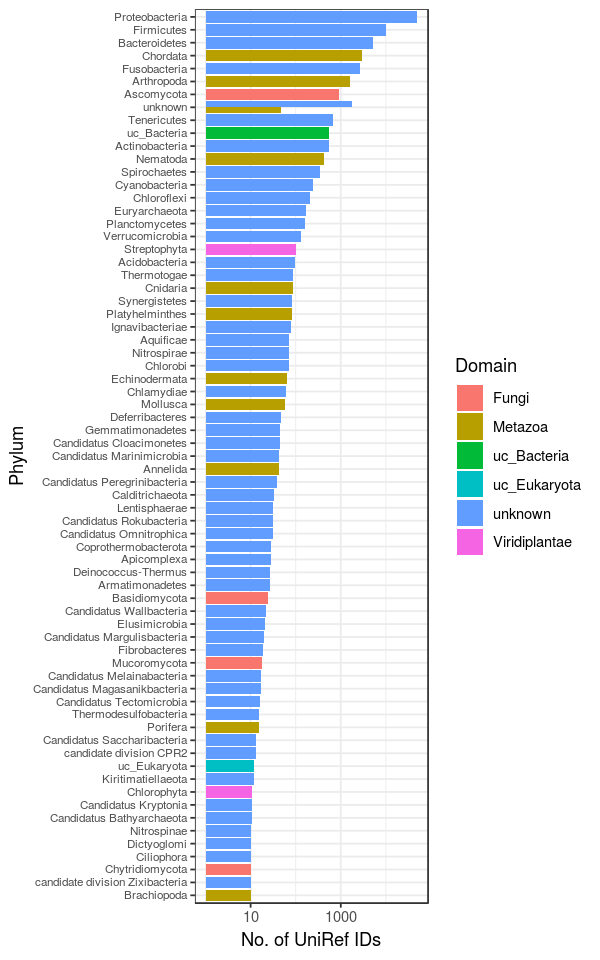

In [34]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,8)
plot(p)

# sessionInfo

In [35]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec